In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/hate_speech.csv")

In [ ]:
df.head()

,Sr. no.,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
df.describe()

,Sr. no.,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [ ]:
df['labels'] = df['class'].map({0:'Hate Speech', 1:'Offensive Language', 2: 'Neither'})

In [ ]:
df.head()

,Sr. no.,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,Neither
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language


In [ ]:
main_df = pd.DataFrame(df, columns=['tweet', 'labels'])

In [ ]:
main_df

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,Neither
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,"you've gone and broke the wrong heart baby, an...",Neither
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,youu got wild bitches tellin you lies,Offensive Language


In [ ]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))

In [ ]:
stemer = nltk.SnowballStemmer('english')

In [ ]:
import string

In [ ]:
def mining(text):
  text = str(text).lower()                 #get rid of site links
  text = re.sub("\[.*?\]", "", text)                             
  text = re.sub('[%s]' %re.escape(string.punctuation), "", text)  #get rid of punctuations
  text = re.sub('\n', "", text)                                   #get rid of new line
  text = re.sub('\w*\d\w*', "", text)
  text = [word for word in text.split(" ") if word not in stopwords] #removing stop words
  text = " ".join(text)
  text = [stemer.stem(word) for word in text.split(' ') ]
  text = " ".join(text)
  return text

In [ ]:
main_df['tweet'] = main_df['tweet'].apply(mining)

In [ ]:
main_df

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,Neither
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive Language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive Language
3,rt cganderson vivabas look like tranni,Offensive Language
4,rt shenikarobert shit hear might true might f...,Offensive Language
...,...,...
24778,yous muthafin lie coreyemanuel right tl tras...,Offensive Language
24779,youv gone broke wrong heart babi drove redneck...,Neither
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Language
24781,youu got wild bitch tellin lie,Offensive Language


In [ ]:
X = np.array(main_df['tweet'])
y =np.array(main_df['labels'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
vec = CountVectorizer()
X = vec.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, random_state = 2)

In [ ]:
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#dt = DecisionTreeClassifier()
dt = RandomForestClassifier(n_estimators = 100)
dt.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#X_test = np.array(X_test, dtype=object)
pred = dt.predict(X_test)

In [ ]:
pred = pd.DataFrame(pred)
#X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

In [ ]:
pred

,0
0,Neither
1,Offensive Language
2,Offensive Language
3,Neither
4,Offensive Language
...,...
9909,Offensive Language
9910,Neither
9911,Offensive Language
9912,Offensive Language


In [ ]:
data = pd.concat([pred, y_test] , axis=1)

In [ ]:
data

,0,0
0,Neither,Neither
1,Offensive Language,Offensive Language
2,Offensive Language,Offensive Language
3,Neither,Neither
4,Offensive Language,Offensive Language
...,...,...
9909,Offensive Language,Offensive Language
9910,Neither,Neither
9911,Offensive Language,Offensive Language
9912,Offensive Language,Offensive Language


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
cm

array([[ 124,   39,  383],
       [  15, 1405,  270],
       [ 109,  232, 7337]])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

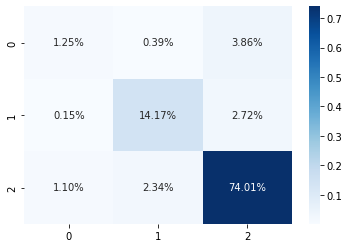

In [ ]:
sns.heatmap(cm/np.sum(cm), annot= True, fmt='.2%', cmap='Blues')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8942909017550938